<a href="https://colab.research.google.com/github/Nikita7414/coronavirus-tweet-sentiment-analysis/blob/main/Copy_of_Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**   -  **Coronavirus Tweet Sentiment Analysis**


<img fetchpriority="high" role="img" alt="Photograph of someone holding a photo with twitter on it, and the words COVID-19 in the background." aria-label="Photograph of someone holding a photo with twitter on it, and the words COVID-19 in the background." src="https://spectrum.ieee.org/media-library/photograph-of-someone-holding-a-photo-with-twitter-on-it-and-the-words-covid-19-in-the-background.jpg?id=25591747&amp;width=1200&amp;height=721" style="object-fit: cover;" class="rm-lazyloadable-image rm-hero-media" width="2500" height="500">

##### **Project Type**    - EDA/Classification/Supervised
##### **Contribution**    - Individual
##### **Team Member**  - Nikita Maske

# **Project Summary -**

The CoVid-19 pandemic has shaken the every foundation of society wherein people were forced to live inside their houses because of the lockdown being imposed and also the livelihood of almost every section of the society was impacted.

The objective of our analysis revolved around knowing the sentiments of people from their tweets on Twitter as Twitter is one of the prime means of expression over social media.

# **GitHub Link -**

https://github.com/Nikita7414/coronavirus-tweet-sentiment-analysis

# **Problem Statement**


The given dataset contains 41157 rows and 6 columns.The given dataset contains columns as Location, TweetAt, Original Tweet, Sentiment, User Name, Screen Name





# **General Guidelines** : -  

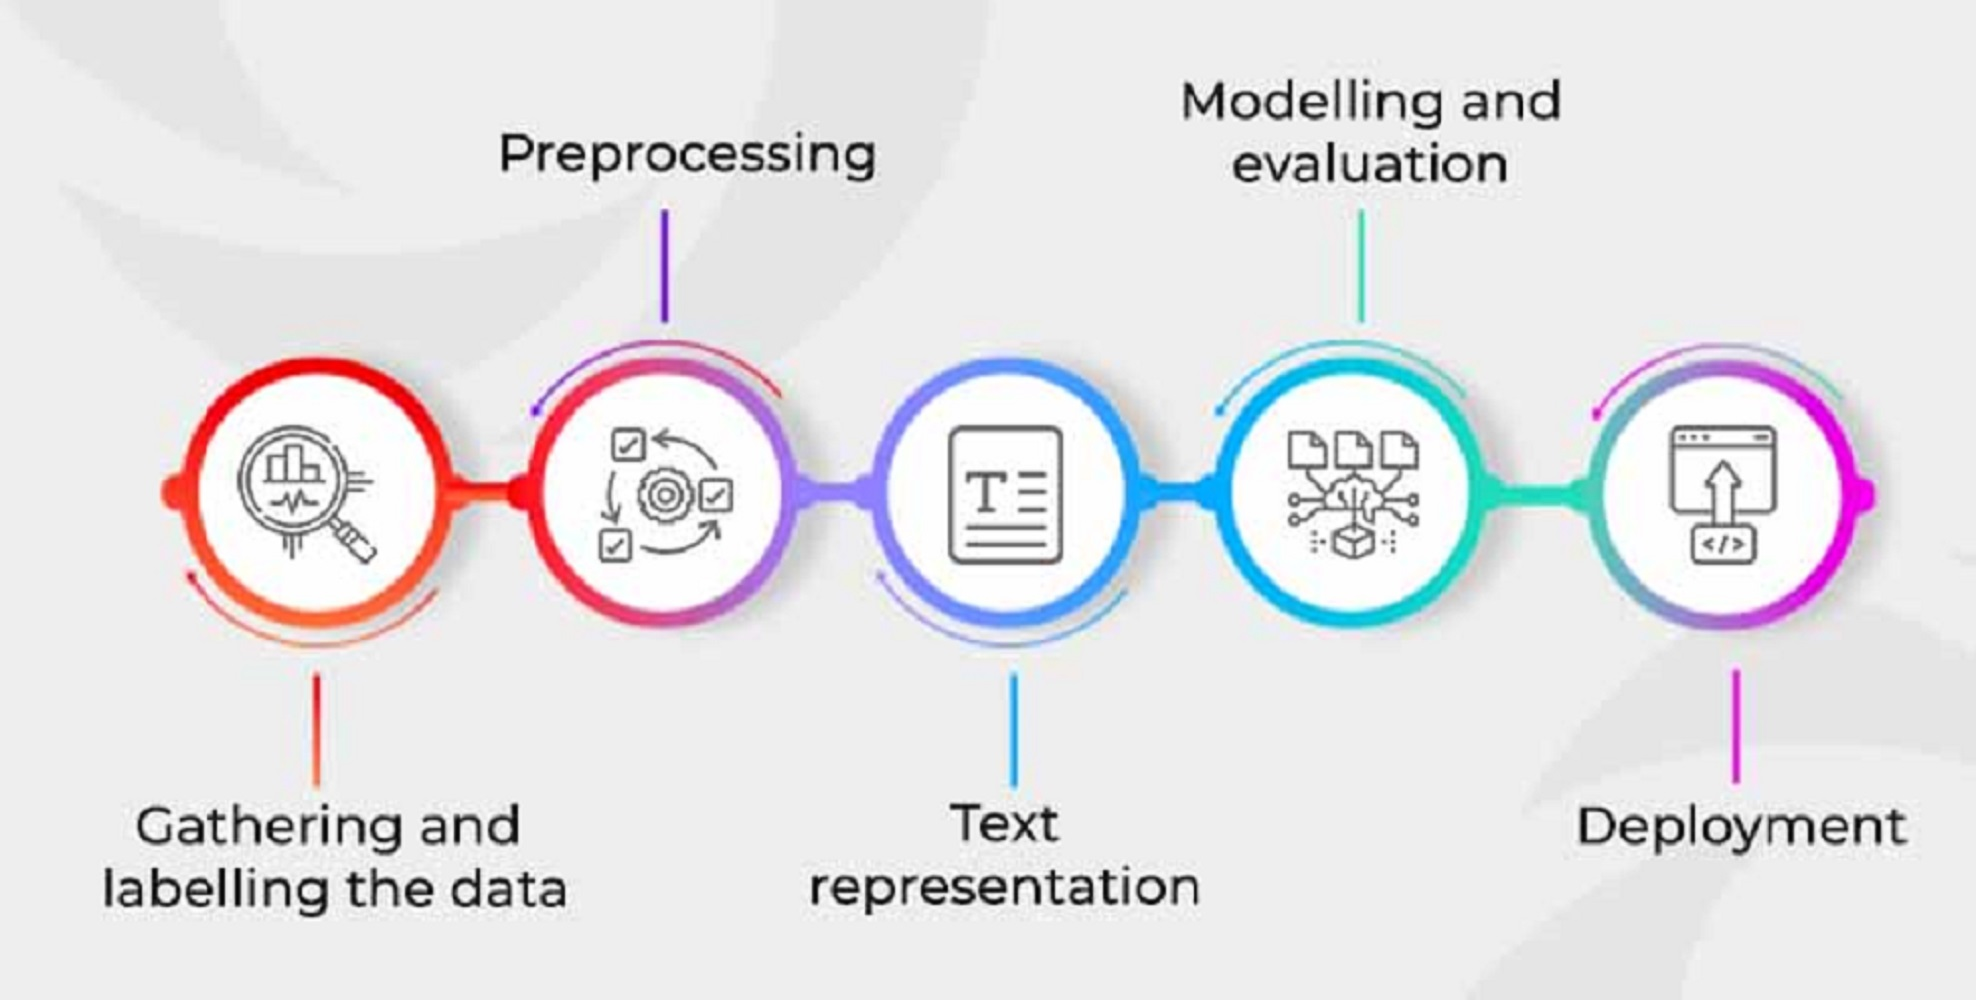

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
df1= pd.read_csv("/content/drive/MyDrive/Coronavirus Tweets.csv",encoding='latin-1')
df1

In [ ]:
#creating copy of given dataset
df=df1.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
# Visualizing the missing values

# Importing the  Missingno libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(df,figsize=(5, 3))

### What did you know about your dataset?

This dataset contains 41157 rows and 6 columns. The given dataset has no duplicate values. Out of this 6 columns 'Location' has 8590 missing values.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description

**UserName:** This column contains the username of the person who posted the tweet.

**ScreenName:** This column contains the screen name or handle of the user who posted the tweet.

**Location:** This column contains the location of the user who posted the tweet. This could be their city, state, country, or any other geographic location that they have specified in their Twitter profile.

**TweetAt:** This column contains the date and time when the tweet was posted.

**OriginalTweet:** This column contains the actual text of the tweet that was posted.

**Sentiment:** This column contains the sentiment label assigned to the tweet. This label could be positive, negative,extremely positive,extremely negative neutral, depending on the sentiment analysis algorithm used to classify the tweet.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.columns

In [ ]:
df.UserName.unique()

In [ ]:
df.ScreenName.unique()

In [ ]:
df.Location.unique()

In [ ]:
df.OriginalTweet.unique()

In [ ]:
df.Sentiment.unique()

In [ ]:
df['UserName'].value_counts()

In [ ]:
df['ScreenName'].value_counts()

In [ ]:

df['Location'].value_counts()

In [ ]:
df['TweetAt'].value_counts()

In [ ]:
df['OriginalTweet'].value_counts()

In [ ]:
df['Sentiment'].value_counts()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#For sentiment analysis we only want tweet and sentiment Features
df=df1[['OriginalTweet','Sentiment']]
df


### What all manipulations have you done and insights you found?

so,for analysis we only need 'originaltweet'and 'sentiment'. That is why we only take here sentiment and originaltweet columns for further process.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***


# Chart - 1

In [ ]:
# Chart - 1 visualization code
msno.matrix(df,figsize=(5, 3))

##### 1. Why did you pick the specific chart?

From this plot we can clearly see that the which column contains missing values.

##### 2. What is/are the insight(s) found from the chart?

we found that out of this 6 columns only 'Location' has 8590 missing values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will create negative imapct on our dataset because due to missing values accuracy of our model will decrease.



# Chart - 2

In [ ]:
# Chart - 2 visualization code
#Count the no of sentiment of each observations
df['Sentiment'].value_counts().reset_index()
reset_val=df['Sentiment'].value_counts().reset_index()
reset_val.columns=['Sentiment','Count']
reset_val


In [ ]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x='Sentiment',y='Count',data=reset_val)
plt.title("Proportion of Sentiment",fontsize=20)
plt.xlabel('Sentiment',fontsize=20)
plt.ylabel('Count',fontsize=20)


In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
df['Sentiment'].value_counts().reset_index()
reset_val1=df['Sentiment'].value_counts().reset_index()
reset_val1.columns=['Sentiment','Count']
reset_val1

##### 1. Why did you pick the specific chart?

This is best graph to show the which sentiment has maximum counts.


##### 2. What is/are the insight(s) found from the chart?

From the size of bars we can clearly say that which sentiment has more counts. So in this dataset Positive class has more sentiments than negative and Nuetral.

# Chart - 3

In [ ]:

# Chart - 3 visualization code
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are useful when you want to show the relative sizes of different categories, and they allow for quick and easy comparison between the categories.In this case, the whole data is the set of tweets, and the parts are the different sentiment categories (positive, negative, and neutral).

##### 2. What is/are the insight(s) found from the chart?

Positive Sentiment is in High Proportion as 43.85% as compared to negative and netural i.e 18.74% and 37.41%.

#chart- 4

In [ ]:

# Chart - 3 visualization code
#Top 10 most frequently occurring locations from the 'Location' column of the tweet DataFrame.
Top_Location_Of_tweet= df['Location'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')


In [ ]:
Top_Location_Of_tweet

In [ ]:
Top_Location_Of_tweet=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet.reset_index(inplace=True)
Top_Location_Of_tweet.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet

In [ ]:
# create a bar plot using Seaborn library
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet,
                 palette="husl")
# Set plot title, y-axis label, and x-axis label
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
# Rotate x-axis labels by 45 degrees to make them easier to read
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##### 1. Why did you pick the specific chart?

To visualize this data, a bar chart is a good choice. A bar chart can effectively show the count of tweets from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the count of tweets from that location.



##### 2. What is/are the insight(s) found from the chart?

City London has Highest tweet comapred to other city tweet.

# Chart - 5

In [ ]:
# Plotting the piechart for Sentiments distribution
import pandas as pd
import plotly.express as px
# plot the original tweet column as a bar plot
df['TweetAt'].value_counts().head(15).plot(kind='bar',color='green')

# set the plot title and axis labels
plt.title('Count of Original Tweets by Date')
plt.xlabel('Tweet Date')
plt.ylabel('Count')

# display the plot
plt.show()


##### 1. Why did you pick the specific chart?

This is the bar chart .which shows the clear visualisation on which date it shows tweets are more.

##### 2. What is/are the insight(s) found from the chart?

out o first 10 date 20-03-2020 has more sentiment count.

# Chart - 6

In [ ]:
# Chart - 6 visualization code

In [ ]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count


In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)


##### 1. Why did you pick the specific chart?

This is the bar plot which is used to show the quantity of positive, negative and neural sentiment .





##### 2. What is/are the insight(s) found from the chart?

The size of positive sentiment is bigger than negative and neural sentiment

#### What all missing value imputation techniques have you used and why did you use those techniques?

'Location' column has 8590 missing values.But here location contains categorical values and also we are not using this column for our nlp analysis.

#chart- 7

In [ ]:
#calculates the length (number of characters) of each tweet and stores the result in the text_length column.
df['text_length'] = df['OriginalTweet'].apply(len)

In [ ]:
tweet_character_length=df['text_length'].sort_values(ascending=False)

In [ ]:
# Create a DataFrame `top_tweet_character_length` from `tweet_character_length
top_tweet_character_length=pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)


In [ ]:
top_tweet_character_length

In [ ]:
# Select the top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='viridis')

1. Why did you pick the specific chart?

Answer Here.

To visualize this data, a bar chart is a good choice. A bar chart can effectively show the Original_Tweet_Row from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the tweet_character_Count.

2. What is/are the insight(s) found from the chart?

Answer Here

Row Number 25160 has highest Tweet length of character i.e 350

#*4. Feature Engineering & Data Pre-processing*

##*1. Handling Missing Values*


# Handling Missing Values & Missing Value Imputation


In [ ]:
df.isnull().sum().sort_values(ascending=False)

What all missing value imputation techniques have you used and why did you use those techniques?

Here we can find that 'Location' column having null values 8590 and we generally not take 'Location' column as machine learning model as Sentiment analysis.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
print(df[['OriginalTweet', 'Sentiment']].info())

##### What all outlier treatment techniques have you used and why did you use those techniques?

We do not treated/handled the outliers because we did not take any column having continuous data (numerical data) as Dependent/Independent column during the model training.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')


#### 2. Lower Casing

In [ ]:
#all text converting to lower case
df['OriginalTweet']=df['OriginalTweet'].str.lower()
df['OriginalTweet']


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
df['OriginalTweet'][0]

In [ ]:
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)

In [ ]:
df['clean_tweets']

In [ ]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head()

In [ ]:
df['clean_tweets'][0]

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [ ]:
df.clean_tweets[6]

#Stemming

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
#function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df['stemmed'] = df['clean_tweets'].apply(lambda x: stemming(x))

In [ ]:
df.stemmed.head()

#Lemmatizing

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [ ]:
df.head()

##### Which text normalization technique have you used and why?

Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.

Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.

#**EDA**

#Tweet Count For Each Sentiment

In [ ]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

#Observation :
Number of "Positive" sentiments are higher than all other sentiments

In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,5))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

#Obeservation :

We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.

In [ ]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [ ]:
from collections import Counter
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

#Obeservation :
Word such as 'Covid' and 'Coronavirus' are having large number of frequency present in our dataset.

#Word cloud

In [ ]:
#seperating the sentiments for word cloud
neutral = pd.DataFrame(df[['stemmed','lemmed']] [df['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Positive'])
negative = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Negative'])

In [ ]:

# create text from all tweets
all_words =' '.join([str(text) for text in df['temp_list']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Generating word cloud for positive sentiments
wordcloud.generate(str(positive['lemmed']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Generating word cloud for negative sentiments
wordcloud.generate(str(negative['lemmed']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df.head()

#Data Splitting

In [ ]:
#Assigning dependent and independent features
#Assigning dependent and independent features
X =df['lemmed']
y=df['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

#What data splitting ratio have you used and why?

Data Splitting ratio is 70% used for Training Data and 30% used for Test Data. By providing more data for training, the model can learn more patterns and trends in the data, which can lead to better predictions on new or unseen data.

In [ ]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

In [ ]:
#checking splitted data
print(X_train.head())
y_train.head()

#7. Data Scaling
#Which method have you used to scale you data and why?

Here no need of any scaling of Dataset becuase here only check sentiment of people,hence we analyze only User sentiment tweet according to the secenario of Covid-19.

#Handling Imbalanced Dataset

In [ ]:
df.info()

#Do you think the dataset is imbalanced? Explain Why.

No , here we decided that We used only two column for machine learning modelling i.e 'Original Tweet' & 'Sentiment' and in both column eqaul no of rows

#8. ML Model Implementation

#Count Vectorization (Bag of words) and TF/IDF Vecorization

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
tv_X_train.shape

In [ ]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

#MODEL -1 WITH BAGS OF WORDS

#Implementing Models (Bag of Words) by Count Vectoriser

#*1. Logistic Regression Count Vectoriser Method with Gridsearch CV*

In [ ]:
#1. Logistic Regression Count Vectoriser Method with Gridsearch CV
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [ ]:
pred_lr_cv

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Here the algrothim used Logistic Regression with accuracy of 78% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.

**2.Which hyperparameter optimization technique have you used and why?**

GridSearchCV is used to tune two hyperparameters for the logistic regression model - the regularization penalty (L1 or L2) and the inverse of regularization strength (C). The performance of the model is evaluated using cross-validation with a cv parameter set to 15.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-78%

precision:-76%

recall:- 76%

f1-score:- 76%

#ML Model - 2

#2. Decision Tree Classifier with CV

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [ ]:
pred_dt_cv

In [ ]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

In [ ]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Here the algrothim used Decision Tree with accuracy of 70% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.

**2.Which hyperparameter optimization technique have you used and why?**

Scikit-learn library is used to perform cross-validation on the decision tree model with 5 folds. The np.mean function is then used to calculate the average accuracy score across all folds.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**





Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-70%

precision:-68%

recall:- 69%

f1-score:- 69%

#ML Model - 3

# K-NN Count Vectorizer with GridsearchCV


In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_cv.fit(cv_X_train, y_train)

In [ ]:
#predicted values
pred_knn_cv = knn_cv.predict(cv_X_test)

In [ ]:
pred_knn_cv

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

In [ ]:
#Plotting Confussion matrix
cf4= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

KNN algorithm was used to classify the data, resulting in an accuracy of 39%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed not improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

The range of possible values for n_neighbors is defined in the param_grid dictionary, which contains a list of integers from 1 to 9. GridSearchCV is then used to evaluate the performance of the KNN algorithm with each value of n_neighbors, using 5-fold cross-validation.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-41%

Precision:-50%

Recall:-47%

f1-score:- 41%

#ML Model - 4

#4. SVM with CV

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [ ]:
pred_svm_cv

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

In [ ]:
#Plotting Confussion matrix
cf5= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Support Vector Machine algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improved compared to the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-76%

Precision:-74%

Recall:- 74%

f1-score:-74%

#ML Model - 5

#Implementing Models by TF/IDF Vectorizer
#5. Logistic Regression TF/IDF vectorizer with GridsearchCV

In [ ]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

In [ ]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [ ]:
pred_lr_tv_Gcv

In [ ]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

In [ ]:
#Plotting Confussion matrix
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Logistic Regression algorithm was used to classify the data, resulting in an accuracy of 77%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

The hyperparameter space is defined by the "parameters" dictionary, which specifies the values of the regularization parameter C and the penalty term (l1 or l2). GridSearchCV also helps to prevent overfitting and ensures that the model generalizes well to unseen data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-77%

Precision:-75%

Recall:- 74%

f1-score:-75%

#ML MODEL 6

#6. Decision tree classifier with TF/IDF

In [ ]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [ ]:
pred_dt_tv

In [ ]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

In [ ]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Decision Tree algorithm was used to classify the data, resulting in an accuracy of 62%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

No, as seen in above Evaluation metric Score Chart as follows and here accuracy is not much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-62%

Precision:-60%

Recall:- 61%

f1-score:-60%

#ML MODEL 7

#7. XG-Boost classifier with TF/IDF

In [ ]:
# Initializing model
xgb_tv=DecisionTreeClassifier()

#fitting the data to model
xgb_tv.fit(tv_X_train,y_train)

#prediction
pred_xgb_tv=xgb_tv.predict(tv_X_test)

In [ ]:
pred_xgb_tv

In [ ]:
# Accuracy
cv_score_xgb_tv= cross_val_score(xgb_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_xgb_tv)))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_xgb_tv))

In [ ]:
#Plotting Confussion matrix
cf3a= (confusion_matrix(y_test,pred_xgb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (XG Boost with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#Observation :
This model gives an accuracy score of 60 % which implies that our model is performing well.

#ML MODEL 8

#8. KNN TF/ID with GridsearchCV

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)

In [ ]:
#predicted values
pred_knn_tv = knn_cv.predict(tv_X_test)

In [ ]:
pred_knn_tv

In [ ]:
# Accuracy
accuracy_KNN_tv = accuracy_score(y_test,pred_knn_tv)
print("Accuracy :",(accuracy_KNN_tv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tv))

In [ ]:
#Plotting Confussion matrix
cf4a= (confusion_matrix(y_test,pred_xgb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

KNN algorithm was used to classify the data, resulting in an accuracy of 39%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed not improved compared to the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

The range of possible values for n_neighbors is defined in the param_grid dictionary, which contains a list of integers from 1 to 9. GridSearchCV is then used to evaluate the performance of the KNN algorithm with each value of n_neighbors, using 5-fold cross-validation.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-38%

Precision:-55%

Recall:-34%

f1-score:- 19%

#ML MODEL 9

#9. SVM with TF/ID

In [ ]:
# Initializing model
svm_tv = SVC()

#fitting the data to model
svm_tv.fit(tv_X_train,y_train)

#prediction
pred_svm_tv = svm_tv.predict(tv_X_test)

In [ ]:
pred_svm_tv

In [ ]:
# Accuracy
accuracy_svm_tv = accuracy_score(y_test,pred_svm_tv)
print("Accuracy :",(accuracy_svm_tv))

In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_tv))

In [ ]:
#Plotting Confussion matrix
cf5a= (confusion_matrix(y_test,pred_svm_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf5a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Support Vector Machine was used to classify the data, resulting in an accuracy of 77%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved model as compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is improved as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-77%

Precision:-76%

Recall:- 73%

f1-score:-74%

#Observation :
This model gives an accuracy score of 76% which implies that our model is performing well.

#Classfication Metrics Report

Classification metrics are used to evaluate the performance of a classification model by comparing the predicted labels to the actual labels. Accuracy can be useful in evaluating sentiment analysis models, particularly if the classes are balanced.

Accuracy: The proportion of correctly predicted labels out of the total number of samples. It is computed as (TP+TN)/(TP+TN+FP+FN)

Where

TP:-True Positive

TN:-True Negative

FP:-False Positive

FN:-False Negative

In [ ]:
# Model's acurracy Score Comparision

acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier'],
        'Count Vector':  [accuracy_lr_cv,np.mean(cv_score_dt_cv),accuracy_KNN,accuracy_svc],
        'Tf/idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv),accuracy_KNN_tv,accuracy_svm_tv]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])

cv_score_table

#1. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the metrics chart above, we can conclude that the Logistic Regression with GridserachCV modelusing Count Vectorization Technique performed better with an accuracy level of 78%, compared to Logistic Regression using Tf/idf Vectorization which achieved an accuracy level of 77%.

# **Conclusion**

1. We applied 5 different machine learing models namely, Logistic Regression with Grid Search CV, Desision Tree Classifier, XG Boost, KNN, SVM Classifier for both Count Vector And TF IDF Vectorisation techniques.
2. We conclude that the machine is generating best results for Logistic Regression with Grid Search CV model with and Accuracy score of 78.28% and 77.43% respectively for Count vector and TF/idf Vector, followed by SVM
3. Also, we observed that no overfitting is seen for the data, and we can deploy this model.
4. The sentiments of future tweets can be easily predicted using this model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***